In [1]:
# Libraries
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [2]:
# Constant Variables
# Settings
ON_TIME_THRESHOLD_IN_SECONDS = 180

# Directories
DATA_DIRECTORY = 'data/'
GRAPHS_DIRECTORY = 'graphs/'
STATIC_DATA_DIRECTORY = 'static_data/'

# Filenames
EXTRACTED_REAL_TIME_DATA_FILENAME = 'extracted_real_time_data.json'
LATITUDE_BOXPLOT_BEFORE_CLEANING = 'latitude_boxplot_before_cleaning.png'
LONGITUDE_BOXPLOT_BEFORE_CLEANING = 'longitude_boxplot_before_cleaning.png'
LATITUDE_BOXPLOT_AFTER_CLEANING = 'latitude_boxplot_after_cleaning.png'
LONGITUDE_BOXPLOT_AFTER_CLEANING = 'longitude_boxplot_after_cleaning.png'
STOP_TIMES_FILENAME = 'stop_times.txt'
STOPS_FILENAME = 'stops.txt'
CLEANED_DATA_FILENAME = 'cleaned_data.json'

# Real Time Data (Cleaning)

In [3]:
# Read extracted_real_time_data.json
df_real_time_data = pd.read_json(DATA_DIRECTORY + EXTRACTED_REAL_TIME_DATA_FILENAME, dtype={'RecordedDate': 'str'})
df_real_time_data

,VehicleNo,TripId,RouteNo,Direction,Destination,Pattern,Latitude,Longitude,RecordedTime,RouteMap,RecordedDate
0,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.004250,06:58:07 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
1,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.003483,06:59:07 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
2,16026,13678409,144,NORTH,SFU,NB1,49.225150,-123.002100,07:00:07 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
3,16026,13678409,144,NORTH,SFU,NB1,49.224100,-122.999983,07:01:43 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
4,16026,13678409,144,NORTH,SFU,NB1,49.224367,-122.997567,07:02:24 am,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
...,...,...,...,...,...,...,...,...,...,...,...
87917,19036,13717298,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.278533,-122.912750,11:38:23 pm,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87918,19044,13717218,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.275683,-122.942900,11:41:33 pm,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87919,19046,13717236,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.285817,-123.118700,11:34:14 pm,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87920,22008,13717325,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.281117,-123.004067,11:41:03 pm,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410


In [4]:
# Convert the time strings to datetime.time objects
df_real_time_data['RecordedTime'] = pd.to_datetime(df_real_time_data['RecordedTime'], format='%I:%M:%S %p').dt.time
df_real_time_data

,VehicleNo,TripId,RouteNo,Direction,Destination,Pattern,Latitude,Longitude,RecordedTime,RouteMap,RecordedDate
0,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.004250,06:58:07,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
1,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.003483,06:59:07,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
2,16026,13678409,144,NORTH,SFU,NB1,49.225150,-123.002100,07:00:07,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
3,16026,13678409,144,NORTH,SFU,NB1,49.224100,-122.999983,07:01:43,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
4,16026,13678409,144,NORTH,SFU,NB1,49.224367,-122.997567,07:02:24,{'Href': 'https://nb.translink.ca/geodata/144....,20240407
...,...,...,...,...,...,...,...,...,...,...,...
87917,19036,13717298,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.278533,-122.912750,23:38:23,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87918,19044,13717218,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.275683,-122.942900,23:41:33,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87919,19046,13717236,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.285817,-123.118700,23:34:14,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410
87920,22008,13717325,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.281117,-123.004067,23:41:03,{'Href': 'https://nb.translink.ca/geodata/R5.k...,20240410


In [5]:
# Convert the date strings to datetime.date objects
df_real_time_data['RecordedDate'] = pd.to_datetime(df_real_time_data['RecordedDate'], format='%Y%m%d').dt.date
df_real_time_data

,VehicleNo,TripId,RouteNo,Direction,Destination,Pattern,Latitude,Longitude,RecordedTime,RouteMap,RecordedDate
0,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.004250,06:58:07,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
1,16026,13678409,144,NORTH,SFU,NB1,49.225617,-123.003483,06:59:07,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
2,16026,13678409,144,NORTH,SFU,NB1,49.225150,-123.002100,07:00:07,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
3,16026,13678409,144,NORTH,SFU,NB1,49.224100,-122.999983,07:01:43,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
4,16026,13678409,144,NORTH,SFU,NB1,49.224367,-122.997567,07:02:24,{'Href': 'https://nb.translink.ca/geodata/144....,2024-04-07
...,...,...,...,...,...,...,...,...,...,...,...
87917,19036,13717298,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.278533,-122.912750,23:38:23,{'Href': 'https://nb.translink.ca/geodata/R5.k...,2024-04-10
87918,19044,13717218,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.275683,-122.942900,23:41:33,{'Href': 'https://nb.translink.ca/geodata/R5.k...,2024-04-10
87919,19046,13717236,R5,EAST,HASTINGS ST / TO SFU EXCHANGE,E1,49.285817,-123.118700,23:34:14,{'Href': 'https://nb.translink.ca/geodata/R5.k...,2024-04-10
87920,22008,13717325,R5,WEST,HASTINGS ST / TO BURRARD STN,W1,49.281117,-123.004067,23:41:03,{'Href': 'https://nb.translink.ca/geodata/R5.k...,2024-04-10


In [6]:
# Drop the unrelated columns
df_real_time_data.drop(['VehicleNo', 'Destination', 'Pattern', 'RouteMap'], axis=1, inplace=True)
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
0,13678409,144,NORTH,49.225617,-123.004250,06:58:07,2024-04-07
1,13678409,144,NORTH,49.225617,-123.003483,06:59:07,2024-04-07
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
...,...,...,...,...,...,...,...
87917,13717298,R5,WEST,49.278533,-122.912750,23:38:23,2024-04-10
87918,13717218,R5,EAST,49.275683,-122.942900,23:41:33,2024-04-10
87919,13717236,R5,EAST,49.285817,-123.118700,23:34:14,2024-04-10
87920,13717325,R5,WEST,49.281117,-123.004067,23:41:03,2024-04-10


In [7]:
# Drop all null values
df_real_time_data.dropna(axis=1, inplace=True)
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
0,13678409,144,NORTH,49.225617,-123.004250,06:58:07,2024-04-07
1,13678409,144,NORTH,49.225617,-123.003483,06:59:07,2024-04-07
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
...,...,...,...,...,...,...,...
87917,13717298,R5,WEST,49.278533,-122.912750,23:38:23,2024-04-10
87918,13717218,R5,EAST,49.275683,-122.942900,23:41:33,2024-04-10
87919,13717236,R5,EAST,49.285817,-123.118700,23:34:14,2024-04-10
87920,13717325,R5,WEST,49.281117,-123.004067,23:41:03,2024-04-10


In [8]:
# Drop all duplicates
df_real_time_data.drop_duplicates(inplace=True)
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
0,13678409,144,NORTH,49.225617,-123.004250,06:58:07,2024-04-07
1,13678409,144,NORTH,49.225617,-123.003483,06:59:07,2024-04-07
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
...,...,...,...,...,...,...,...
87915,13717184,R5,EAST,49.281133,-123.065783,23:40:30,2024-04-10
87916,13717345,R5,WEST,49.284533,-123.112633,23:41:14,2024-04-10
87918,13717218,R5,EAST,49.275683,-122.942900,23:41:33,2024-04-10
87920,13717325,R5,WEST,49.281117,-123.004067,23:41:03,2024-04-10


In [9]:
# Filter the recorded time bewteen 7:00 to 23:00
df_real_time_data = df_real_time_data[(df_real_time_data['RecordedTime'].apply(lambda x: x.hour >= 7)) & (df_real_time_data['RecordedTime'].apply(lambda x: x.hour < 23))]
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
5,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07
6,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07
...,...,...,...,...,...,...,...
87629,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10
87630,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10
87631,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10
87632,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10


In [10]:
# Filter the recorded date bewteen April 7 to April 10
df_real_time_data = df_real_time_data[(df_real_time_data['RecordedDate'].apply(lambda x: x.day >= 7)) & (df_real_time_data['RecordedDate'].apply(lambda x: x.day <= 10))]
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
3,13678409,144,NORTH,49.224100,-122.999983,07:01:43,2024-04-07
4,13678409,144,NORTH,49.224367,-122.997567,07:02:24,2024-04-07
5,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07
6,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07
...,...,...,...,...,...,...,...
87629,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10
87630,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10
87631,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10
87632,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10


# Real Time Data (Outliers)

In [11]:
# Get the unique values of TripId
TripId_list = df_real_time_data['TripId'].unique()
TripId_list

array([13678409, 13678464, 13678465, 13678412, 13678470, 13678466,
       13678430, 13678437, 13678427, 13678445, 13678404, 13678471,
       13678433, 13678438, 13678423, 13678447, 13678435, 13678444,
       13678413, 13678446, 13678417, 13678451, 13678420, 13678460,
       13678414, 13678424, 13678459, 13678432, 13678449, 13678428,
       13678457, 13678456, 13678419, 13678415, 13678455, 13678407,
       13678454, 13678425, 13678442, 13678458, 13678410, 13678461,
       13678434, 13678405, 13678453, 13678469, 13678426, 13678468,
       13678431, 13678467, 13678418, 13678452, 13678416, 13678450,
       13678429, 13678443, 13678406, 13678441, 13678422, 13678440,
       13678421, 13678439, 13678225, 13678230, 13678228, 13678258,
       13678277, 13678216, 13678295, 13678248, 13678224, 13678303,
       13678306, 13678206, 13678294, 13678231, 13678274, 13678241,
       13678293, 13678195, 13678273, 13678236, 13678307, 13678198,
       13678288, 13678204, 13678312, 13678296, 13678218, 13678

In [12]:
# Get the unique values of RouteNo
RouteNo_list = df_real_time_data['RouteNo'].unique()
RouteNo_list

array([144, 145, 'R5'], dtype=object)

In [13]:
# Get the unique values of Direction
Direction_list = df_real_time_data['Direction'].unique()
Direction_list

array(['NORTH', 'SOUTH', 'WEST', 'EAST'], dtype=object)

In [14]:
# Get the stats of the real time data
df_real_time_data.describe()

,TripId,Latitude,Longitude
count,7.095700e+04,70957.000000,70957.000000
mean,1.369993e+07,49.151354,-122.686839
std,1.941392e+04,2.422940,6.082369
min,1.367819e+07,0.000000,-123.120783
25%,1.367843e+07,49.261850,-123.043317
50%,1.371718e+07,49.279150,-122.968883
75%,1.371733e+07,49.281133,-122.920783
max,1.372213e+07,49.288350,0.000000


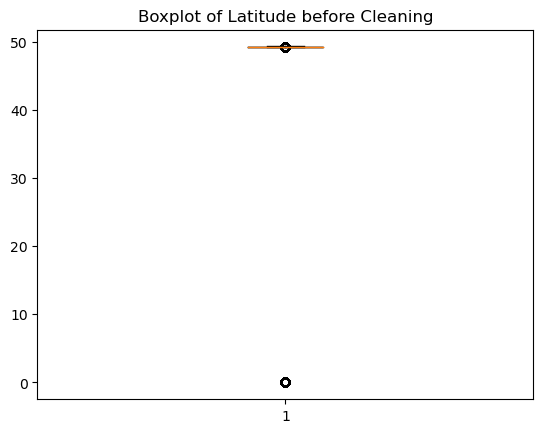

In [15]:
# Plot the graph of Latitude
plt.title('Boxplot of Latitude before Cleaning')
plt.boxplot(df_real_time_data['Latitude'])
plt.savefig(GRAPHS_DIRECTORY + LATITUDE_BOXPLOT_BEFORE_CLEANING)

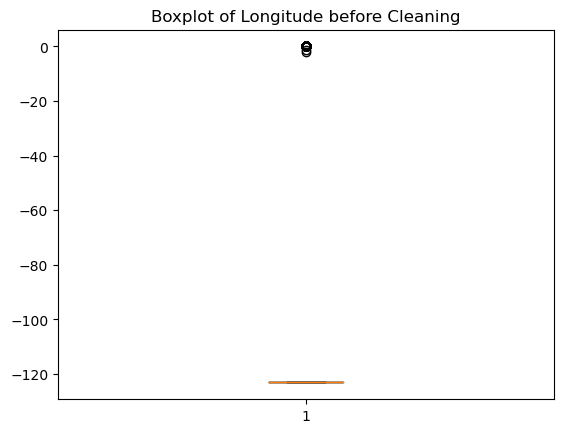

In [16]:
# Plot the graph of Longitude
plt.title('Boxplot of Longitude before Cleaning')
plt.boxplot(df_real_time_data['Longitude'])
plt.savefig(GRAPHS_DIRECTORY + LONGITUDE_BOXPLOT_BEFORE_CLEANING)

In [17]:
# Remove all outliers of Latitude and Longitude
latitude_head = df_real_time_data['Latitude'].quantile(0.01)
latitude_tail = df_real_time_data['Latitude'].quantile(0.99)
longitude_head = df_real_time_data['Longitude'].quantile(0.01)
longitude_tail = df_real_time_data['Longitude'].quantile(0.99)
df_real_time_data = df_real_time_data[(df_real_time_data['Latitude'] >= latitude_head) & 
        (df_real_time_data['Latitude'] <= latitude_tail) & 
        (df_real_time_data['Longitude'] >= longitude_head) & 
        (df_real_time_data['Longitude'] <= longitude_tail)]
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
2,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
5,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07
6,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07
7,13678409,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07
8,13678409,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07
...,...,...,...,...,...,...,...
87629,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10
87630,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10
87631,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10
87632,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10


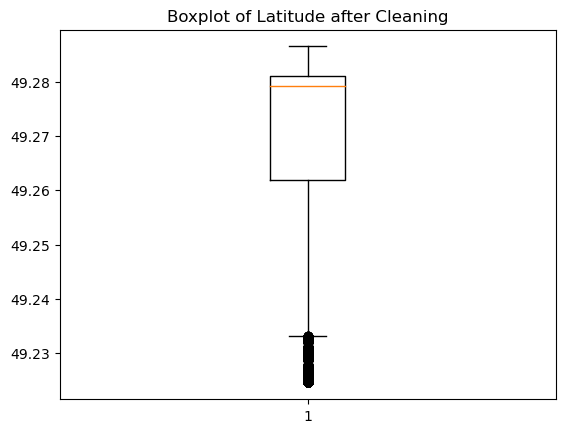

In [18]:
# Plot the graph of Latitude
plt.title('Boxplot of Latitude after Cleaning')
plt.boxplot(df_real_time_data['Latitude'])
plt.savefig(GRAPHS_DIRECTORY + LATITUDE_BOXPLOT_AFTER_CLEANING)

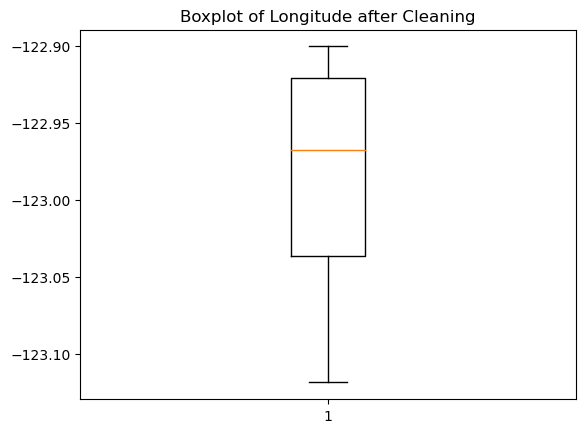

In [19]:
# Plot the graph of Longitude
plt.title('Boxplot of Longitude after Cleaning')
plt.boxplot(df_real_time_data['Longitude'])
plt.savefig(GRAPHS_DIRECTORY + LONGITUDE_BOXPLOT_AFTER_CLEANING)

In [20]:
# Reset the index of the real time data
df_real_time_data.reset_index(drop=True, inplace=True)
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate
0,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07
1,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07
2,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07
3,13678409,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07
4,13678409,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07
...,...,...,...,...,...,...,...
68452,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10
68453,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10
68454,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10
68455,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10


# Static Data (Cleaning)

In [21]:
# Read stop_times.txt
# static_data/stop_times.txt is removed due to the size limit
# Please download the file from the link https://gtfs-static.translink.ca/gtfs/History/2024-04-05/google_transit.zip
df_stop_times = pd.read_csv(STATIC_DATA_DIRECTORY + STOP_TIMES_FILENAME)
df_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,13826154,09:24:00,09:24:00,7166,1,NaN,NaN,NaN,NaN,NaN
1,13826154,09:25:32,09:25:32,7096,2,NaN,NaN,NaN,0.4895,NaN
2,13826154,09:26:09,09:26:09,7093,3,NaN,NaN,NaN,0.6877,NaN
3,13826154,09:31:13,09:31:13,9291,4,NaN,NaN,NaN,2.2914,NaN
4,13826154,09:31:53,09:31:53,9292,5,NaN,NaN,NaN,2.5024,NaN
...,...,...,...,...,...,...,...,...,...,...
3546400,13698848,10:53:53,10:53:53,6038,26,NaN,NaN,NaN,9.2095,NaN
3546401,13698848,10:55:17,10:55:17,10695,27,NaN,NaN,NaN,9.6125,NaN
3546402,13698848,10:56:09,10:56:09,5310,28,NaN,NaN,NaN,9.8606,NaN
3546403,13698848,10:56:49,10:56:49,5311,29,NaN,NaN,NaN,10.0516,NaN


In [22]:
# Drop the unrelated columns
df_stop_times.drop(['departure_time', 'stop_sequence', 'stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled', 'timepoint'], axis=1, inplace=True)
df_stop_times

,trip_id,arrival_time,stop_id
0,13826154,09:24:00,7166
1,13826154,09:25:32,7096
2,13826154,09:26:09,7093
3,13826154,09:31:13,9291
4,13826154,09:31:53,9292
...,...,...,...
3546400,13698848,10:53:53,6038
3546401,13698848,10:55:17,10695
3546402,13698848,10:56:09,5310
3546403,13698848,10:56:49,5311


In [23]:
# Filter the trip_id which is in the real time data
df_stop_times = df_stop_times[df_stop_times['trip_id'].isin(TripId_list)]
df_stop_times

,trip_id,arrival_time,stop_id
26864,13722115,10:40:00,9069
26865,13722115,10:40:59,11438
26866,13722115,10:42:38,2737
26867,13722115,10:45:05,2738
26868,13722115,10:51:25,2739
...,...,...,...
3542845,13717671,21:15:56,1863
3542846,13717671,21:17:34,1865
3542847,13717671,21:20:08,1870
3542848,13717671,21:27:51,1873


In [24]:
# Convert the time strings to the datatime.time objects
df_stop_times['arrival_time'] = pd.to_datetime(df_stop_times['arrival_time'], format='%H:%M:%S').dt.time
df_stop_times

C:\Users\Cheuk Lam\AppData\Local\Temp\ipykernel_23828\2095994125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stop_times['arrival_time'] = pd.to_datetime(df_stop_times['arrival_time'], format='%H:%M:%S').dt.time


,trip_id,arrival_time,stop_id
26864,13722115,10:40:00,9069
26865,13722115,10:40:59,11438
26866,13722115,10:42:38,2737
26867,13722115,10:45:05,2738
26868,13722115,10:51:25,2739
...,...,...,...
3542845,13717671,21:15:56,1863
3542846,13717671,21:17:34,1865
3542847,13717671,21:20:08,1870
3542848,13717671,21:27:51,1873


In [25]:
# Read stops.txt
df_stops = pd.read_csv(STATIC_DATA_DIRECTORY + STOPS_FILENAME)
df_stops

,stop_lat,wheelchair_boarding,stop_code,stop_lon,stop_id,stop_url,parent_station,stop_desc,stop_name,location_type,zone_id
0,49.248581,1,53331.0,-122.843968,11543,NaN,NaN,NaN,Northbound Laurentian Cres @ Austin Ave,0,BUS ZN
1,49.170215,1,61521.0,-123.125653,11540,NaN,NaN,NaN,Westbound Westminster Hwy @ Garden City Rd,0,BUS ZN
2,49.219164,1,51114.0,-123.150433,11541,NaN,NaN,NaN,Southbound West Blvd @ W 57 Ave,0,BUS ZN
3,49.452388,2,61528.0,-123.236624,11546,NaN,NaN,NaN,Northbound Hwy 99 Onramp @ Kelvin Grove Way,0,BUS ZN
4,49.386350,2,61527.0,-123.258380,11547,NaN,NaN,NaN,Northbound Horseshoe Bay Dr @ Pasco Rd,0,BUS ZN
...,...,...,...,...,...,...,...,...,...,...,...
8854,49.184425,1,58156.0,-122.779179,8486,NaN,NaN,NaN,Westbound 100 Ave @ 160 St,0,BUS ZN
8855,49.184423,1,58157.0,-122.784642,8487,NaN,NaN,NaN,Westbound 100 Ave @ 158 St,0,BUS ZN
8856,49.051695,1,58236.0,-122.867263,8488,NaN,NaN,NaN,Northbound 128 St @ 26B Ave,0,BUS ZN
8857,49.101358,1,58237.0,-122.801231,8489,NaN,NaN,NaN,Southbound 152 St @ 54A Ave,0,BUS ZN


In [26]:
# Drop the unrelated columns
df_stops.drop(['wheelchair_boarding', 'stop_code', 'stop_url', 'parent_station', 'stop_desc', 'stop_name', 'location_type', 'zone_id'], axis=1, inplace=True)
df_stops

,stop_lat,stop_lon,stop_id
0,49.248581,-122.843968,11543
1,49.170215,-123.125653,11540
2,49.219164,-123.150433,11541
3,49.452388,-123.236624,11546
4,49.386350,-123.258380,11547
...,...,...,...
8854,49.184425,-122.779179,8486
8855,49.184423,-122.784642,8487
8856,49.051695,-122.867263,8488
8857,49.101358,-122.801231,8489


In [27]:
# Merge the stop times data and the stops data
df_static_data = pd.merge(df_stop_times, df_stops, on='stop_id', how='inner')
df_static_data

,trip_id,arrival_time,stop_id,stop_lat,stop_lon
0,13722115,10:40:00,9069,49.285902,-123.112537
1,13722113,18:37:00,9069,49.285902,-123.112537
2,13717285,09:09:00,9069,49.285902,-123.112537
3,13717265,18:12:00,9069,49.285902,-123.112537
4,13717264,19:27:00,9069,49.285902,-123.112537
...,...,...,...,...,...
16337,13717410,15:14:00,10553,49.284810,-123.112535
16338,13717411,07:27:00,10553,49.284810,-123.112535
16339,13717418,14:25:00,10553,49.284810,-123.112535
16340,13717419,14:19:00,10553,49.284810,-123.112535


In [28]:
# Drop the unrelated columns
df_static_data.drop(['stop_id'], axis=1, inplace=True)
df_static_data

,trip_id,arrival_time,stop_lat,stop_lon
0,13722115,10:40:00,49.285902,-123.112537
1,13722113,18:37:00,49.285902,-123.112537
2,13717285,09:09:00,49.285902,-123.112537
3,13717265,18:12:00,49.285902,-123.112537
4,13717264,19:27:00,49.285902,-123.112537
...,...,...,...,...
16337,13717410,15:14:00,49.284810,-123.112535
16338,13717411,07:27:00,49.284810,-123.112535
16339,13717418,14:25:00,49.284810,-123.112535
16340,13717419,14:19:00,49.284810,-123.112535


# OnTime Column

In [29]:
# Calculate the time difference in seconds
def time_difference(time1, time2):
    seconds1 = time1.hour * 3600 + time1.minute * 60 + time1.second
    seconds2 = time2.hour * 3600 + time2.minute * 60 + time2.second

    return abs(seconds2 - seconds1)

In [30]:
# # Calculate the average speed for each trip_id
# grouped_trip_id = df_static_data.groupby('trip_id')
# total_distance = []
# total_travel_time = []

# # Loop for each trip_id
# for trip_id, group_data in grouped_trip_id:
#     # Sort the group_data
#     sorted_group_data = group_data.sort_values(by='arrival_time')
    
#     # Calculate the total distance
#     distance = 0
#     for i in range(len(sorted_group_data) - 1):
#         distance += geodesic(
#             (sorted_group_data.iloc[i]['stop_lat'], sorted_group_data.iloc[i]['stop_lon']),
#             (sorted_group_data.iloc[i + 1]['stop_lat'], sorted_group_data.iloc[i + 1]['stop_lon'])
#         ).meters
    
#     # Calculate the total travel time
#     travel_time = time_difference(sorted_group_data['arrival_time'].max(), sorted_group_data['arrival_time'].min())
    
#     # Update the lists
#     total_distance.append(distance)
#     total_travel_time.append(travel_time)

In [31]:
# # Create a data frame for average speed    
# df_average_speed = pd.DataFrame({
#     'trip_id': grouped_trip_id.groups.keys(),
#     'total_distance': total_distance,
#     'total_travel_time': total_travel_time
# })
# df_average_speed.set_index('trip_id', inplace=True)
# df_average_speed['average_speed'] = df_average_speed['total_distance'] / df_average_speed['total_travel_time']

# df_average_speed

In [32]:
# Loop for each row of the real time data
for index, row in df_real_time_data.iterrows():
    # print('Calculating the row:', index)
    
    # Get the TripId
    trip_id = row['TripId']

    # Get the related bus stop schedule
    df_bus_stop_schedule = df_static_data[df_static_data['trip_id'] == trip_id]

    # Find the closest bus stop
    closest_bus_stop = None
    min_distance = float('inf')
    for _, bus_stop in df_bus_stop_schedule.iterrows():
        distance = geodesic(
            (row['Latitude'], row['Longitude']), 
            (bus_stop['stop_lat'], bus_stop['stop_lon'])
        ).meters
        
        if distance < min_distance:
            min_distance = distance
            closest_bus_stop = bus_stop
            
    if (min_distance > 10):
        df_real_time_data.at[index, 'OnTime'] = None
        continue

    # Calculate the time difference between the arrival time and the recorded time
    travel_time = time_difference(closest_bus_stop['arrival_time'], row['RecordedTime'])
            
    # Calculate the maximum travel time
    # max_travel_time = min_distance / df_average_speed.loc[trip_id]['average_speed'] + ON_TIME_THRESHOLD_IN_SECONDS
    max_travel_time = ON_TIME_THRESHOLD_IN_SECONDS
    
    # Generate the result of on time
    on_time = travel_time <= max_travel_time
            
    # Update the real time data     
    df_real_time_data.at[index, 'OnTime'] = on_time

C:\Users\Cheuk Lam\AppData\Local\Temp\ipykernel_23828\2288083473.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_time_data.at[index, 'OnTime'] = on_time


In [33]:
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime
0,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True
1,13678409,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07,None
2,13678409,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07,None
3,13678409,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07,None
4,13678409,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07,None
...,...,...,...,...,...,...,...,...
68452,13717346,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10,None
68453,13717197,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10,None
68454,13717343,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10,True
68455,13717219,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10,None


In [34]:
# Remove all null values
df_real_time_data = df_real_time_data[df_real_time_data['OnTime'].notnull()]
df_real_time_data

,TripId,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime
0,13678409,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True
11,13678409,144,NORTH,49.240633,-122.968050,07:13:13,2024-04-07,True
19,13678409,144,NORTH,49.258883,-122.964050,07:21:03,2024-04-07,True
20,13678409,144,NORTH,49.258900,-122.964050,07:22:03,2024-04-07,True
38,13678464,144,SOUTH,49.243283,-122.973483,07:39:40,2024-04-07,True
...,...,...,...,...,...,...,...,...
68428,13717345,R5,WEST,49.278533,-122.912733,22:55:24,2024-04-10,False
68429,13717347,R5,WEST,49.281400,-123.099283,22:55:13,2024-04-10,False
68442,13717343,R5,WEST,49.281200,-123.025350,22:57:30,2024-04-10,True
68448,13717343,R5,WEST,49.281183,-123.025333,22:58:29,2024-04-10,True


In [35]:
# Drop the unrelated columns
df_real_time_data.drop(['TripId'], axis=1, inplace=True)
df_real_time_data

C:\Users\Cheuk Lam\AppData\Local\Temp\ipykernel_23828\621490821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_time_data.drop(['TripId'], axis=1, inplace=True)


,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True
11,144,NORTH,49.240633,-122.968050,07:13:13,2024-04-07,True
19,144,NORTH,49.258883,-122.964050,07:21:03,2024-04-07,True
20,144,NORTH,49.258900,-122.964050,07:22:03,2024-04-07,True
38,144,SOUTH,49.243283,-122.973483,07:39:40,2024-04-07,True
...,...,...,...,...,...,...,...
68428,R5,WEST,49.278533,-122.912733,22:55:24,2024-04-10,False
68429,R5,WEST,49.281400,-123.099283,22:55:13,2024-04-10,False
68442,R5,WEST,49.281200,-123.025350,22:57:30,2024-04-10,True
68448,R5,WEST,49.281183,-123.025333,22:58:29,2024-04-10,True


In [36]:
# Save as cleaned_static_data.json
df_real_time_data.to_json(DATA_DIRECTORY + CLEANED_DATA_FILENAME, orient='records')